# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
print(data.head(20))

data.info()

    total_images  last_price  total_area first_day_exposition  rooms  \
0             20  13000000.0      108.00  2019-03-07T00:00:00      3   
1              7   3350000.0       40.40  2018-12-04T00:00:00      1   
2             10   5196000.0       56.00  2015-08-20T00:00:00      2   
3              0  64900000.0      159.00  2015-07-24T00:00:00      3   
4              2  10000000.0      100.00  2018-06-19T00:00:00      2   
5             10   2890000.0       30.40  2018-09-10T00:00:00      1   
6              6   3700000.0       37.30  2017-11-02T00:00:00      1   
7              5   7915000.0       71.60  2019-04-18T00:00:00      2   
8             20   2900000.0       33.16  2018-05-23T00:00:00      1   
9             18   5400000.0       61.00  2017-02-26T00:00:00      3   
10             5   5050000.0       39.60  2017-11-16T00:00:00      1   
11             9   3300000.0       44.00  2018-08-27T00:00:00      2   
12            10   3890000.0       54.00  2016-06-30T00:00:00   

In [2]:
display(data.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

1) В файле представлены данные о недвижимости, данные распределены по 22 категориям.

2) Пропущено большое количество значений, особенно в столбце is_apartment, parks_nearest, ponds_nearest.

3)first_day_exposition - нужно будет убрать время, т.к. часы и минуты не указаны.
4)is_apartment  - должен иметь тип bool
5)floors_total/parks_around3000/ponds_around3000/balcony/days_exposition/last_price  - должны иметь целочисленное значение int
6)Нулевые значения во многих данных

   

### Шаг 2. Предобработка данных

In [3]:
#missing_counts = data.isnull().sum().sort_values(ascending = False)
#print(missing_counts.head(10))
#is_apartment           20924
#parks_nearest          15620
#ponds_nearest          14589
#balcony                11519
#ceiling_height          9195
#airports_nearest        5542
#cityCenters_nearest     5519
#parks_around3000        5518
#ponds_around3000        5518
#days_exposition         3181

#Начнем с простого - с балконов.
#Если значения пустые в этой категории, возможно, балконов просто нет.
#Поэтому просто заменю все пропущенные значения на ноль и сразу преобразую в целочисленные значения.
data['balcony'] = data['balcony'].fillna(0).astype('int')
#Поменяю формат даты, убрав время, в столбце first_day_exposition
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
#Заменю пропущенные значения days_exposition на ноль и поменяю тип на int
#data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')
#С названиями населнных пунктов (locality_name) не совсем понятны причины отсутствия данных, 
#и менять их не буду.

#С is_apartment не совсем понятно почему так много значений пропущено, думаю, что этот столбец добавили позже.
#Либо же люди не совсем знают разницу между квартирой и апартаментами, потому оставили эту графу пустой.
#Заменю тип данных, но на False перводить не буду,
#т.к. 50 апартаментов во всем датафрейме это слишком маленькое число такого типа недвижимости
#False    2725
#True       50
data ['is_apartment'] = data ['is_apartment'].astype ('bool')

#Думал найти среднюю величину для кухни в соотношении с общим жилым пространством
#print('Количество пропусков в kitchen_area:', data['kitchen_area'].isnull().sum())
#print('Количество пропусков в living_area:', data['living_area'].isnull().sum())
#Количество пропусков в kitchen_area: 2278
#Количество пропусков в living_area: 1903
#Но посмотрев на данные, пришел к выводу, что выставлять среднее значение или вычислять медианы было бы некорректно
#т.к. даже если кваритра ~50 кв.м. из них 45 может быть кухней

#Если подумать, что метраж кухни не указан только в студиях, то:
#data.query('studio')[['kitchen_area', 'living_area']].isnull().sum()
#kitchen_area    149
#living_area      10

#Тогда можно заменить пропущенные значения только здесь, а в остальном не трогать
data.loc[data['studio'] == True, 'kitchen_area'] = 0
#data['kitchen_area'].isna().value_counts()
#False    21570
#True      2129

#По поводу пропусков в расстояниях думал найти закономерности, 
#не нашел как сделать медианы или средние значения,
#но честно сказать, если бы я знал какой-нибудь инструмент автоматического мапинга, то я бы применил его сюда,
#а потому, я оставлю эти значения такими.

#data[data['locality_name'] != 'Санкт-Петербург'][['locality_name', 'cityCenters_nearest', 'airports_nearest','parks_around3000','parks_nearest']].head(10)
#locality_name	cityCenters_nearest	airports_nearest	parks_around3000	parks_nearest
#1	посёлок Шушары	18603.0	12817.0	0.0	NaN
#5	городской посёлок Янино-1	NaN	NaN	NaN	NaN
#6	посёлок Парголово	19143.0	52996.0	0.0	NaN
#8	посёлок Мурино	NaN	NaN	NaN	NaN
#11	Ломоносов	51677.0	48252.0	0.0	NaN
#12	Сертолово	NaN	NaN	NaN	NaN
#13	Петергоф	33058.0	37868.0	1.0	294.0
#14	Пушкин	30759.0	20782.0	0.0	NaN
#20	посёлок Парголово	19311.0	53134.0	0.0	NaN
#22	деревня Кудрово	NaN	NaN	NaN	NaN

#Изменю цену на тип int для дальнейшего удобства.
data['last_price'] = data['last_price'].astype('int')

missing_counts = data.isnull().sum().sort_values(ascending = False)
print(missing_counts.head(20))
#Это всё оставлю,т.к. не до конца ясно, откуда взялись пропуски и как лучше вычислять средние значения и медианы.

#Думаю, что пропуски в метраже от и до локаций появились из-за того, 
#что данные были внесены не изначльно при конструировании таблицы.

parks_nearest           15620
ponds_nearest           14589
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2129
living_area              1903
floors_total               86
locality_name              49
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
studio                      0
floor                       0
is_apartment                0
open_plan                   0
dtype: int64


In [4]:
data['floors_total']=data['floors_total'].fillna(data.groupby(['rooms','locality_name'])['floors_total'].transform('mean'))
data['ceiling_height']=data['ceiling_height'].fillna(data.groupby(['rooms','locality_name'])['ceiling_height'].transform('mean'))




In [5]:
data['days_exposition']=data['days_exposition'].fillna(data.groupby('first_day_exposition')['days_exposition'].transform('mean'))


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23391 non-null float64
floors_total            23697 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21570 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around

In [7]:
missing_counts = data.isnull().sum().sort_values(ascending = False)
print(missing_counts.head(20))

parks_nearest           15620
ponds_nearest           14589
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
kitchen_area             2129
living_area              1903
ceiling_height            308
days_exposition           111
locality_name              49
floors_total                2
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
studio                      0
floor                       0
is_apartment                0
open_plan                   0
dtype: int64


### Шаг 3. Посчитайте и добавьте в таблицу

In [8]:
#1)Цена кв.м:
data['price_sqmeter'] = data['last_price'] / data['total_area']
#В черновике посмотрел тип данных, лучше заменю на целочисленные занчения:
data['price_sqmeter']=data['price_sqmeter'].astype('int')

#2)Временные показатели
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data['week'] = data['first_day_exposition'].dt.week

#3)Этажи квартиры с вариантами
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
data['floor_category'] = data.apply(floor_category, axis = 1)
data['floor_category']=data['floor_category'].fillna(value='')
data.loc[data['floor_category']=='','floor_category']='другой'
#4)Соотношение площадей:
data['living_area_ratio'] = data['living_area'] / data['total_area']
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

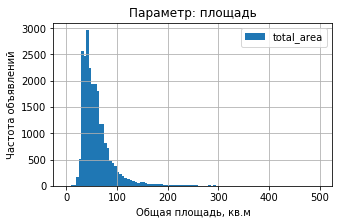

In [9]:
#1) 1. Общая площадь
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))
plt.title('Параметр: площадь')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Частота объявлений')
data['total_area'].describe()
#data['total_area'].mean()
#60.34865099793241

count     23699.000000
mean       6541.548800
std       10887.012837
min          12.000000
25%        3400.000000
50%        4650.000000
75%        6800.000000
max      763000.000000
Name: last_price, dtype: float64

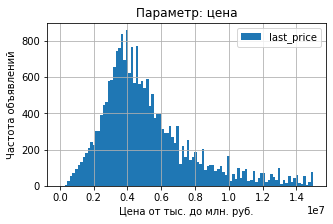

In [10]:
#2.цена
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (5,3))
plt.title('Параметр: цена')
plt.xlabel('Цена от тыс. до млн. руб.')
plt.ylabel('Частота объявлений')
#Приведу в более понятный вид цены:
data['last_price'] = (data[data['last_price'].notnull()]['last_price']/1000*1.0).round().astype(int)
data['last_price'].describe()
#data['last_price'].mean()
#6541.548799527406

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

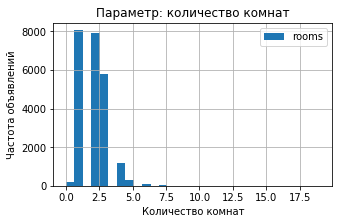

In [11]:
#3.число комнат
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (5,3))
plt.title('Параметр: количество комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Частота объявлений')
data['rooms'].describe()
#data['rooms'].mean()
#2.070635891809781

count    23391.000000
mean         2.774681
std          1.052707
min          1.000000
25%          2.599038
50%          2.700000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

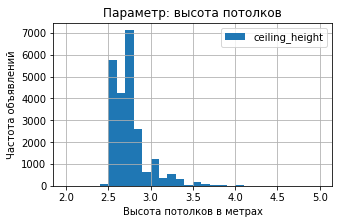

In [12]:
#4.высота потолков
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (5,3))
plt.title('Параметр: высота потолков')
plt.xlabel('Высота потолков в метрах')
plt.ylabel('Частота объявлений')
data['ceiling_height'].describe()
#data['ceiling_height'].mean()
#2.7356015021730875

1. Площадь квартир варьируется от 12 до 900 кв.м., средня длинна квартир составляет 60 кв.м. (69 кв.м. имеют 75% квартир), есть несколько выбросов, но на целое представление данных они мало влияют.
2. Средняя цена квартир 6,5 млн. Но квартиры варьируются от 12 тысяч до 763 млн, что очень странно выглядит.
3. Количество комнат варьируется от 1 до 19, в среднем квартиры имеют 2 комнаты.
4. Высота потолков в среднем 2,7 метра, есть аномальные метровые и 100 метровые потолки. 

1. Выбросы в площади: могли появиться из-за банальных ошибок в заполенении изначльного датафрейма, либо помимо квартир, сюда также заносились частные дома + квартиры с двумя этажами.
2. С ценами , думаю, всё в порядке.
3. 19 комнат это прямо вау - может не было точного числа комнат и данные заполнили исходя из метража квартир, но тогда странно какие комнаты по размеру. Возможно что это одна большая квартира, которая давно была раздроблена на коммуналку.
4. Метровые потолки скорее всего возникли из-за недостаточной информации и просто были заполнены единицами, как и сто метровые. Но потолки в сто метров могли быть расчитаны из того, что квартира может включать в себя два этажа.

count    23588.000000
mean       167.950586
std        213.617724
min          1.000000
25%         38.000000
50%         86.000000
75%        206.900000
max       1580.000000
Name: days_exposition, dtype: float64

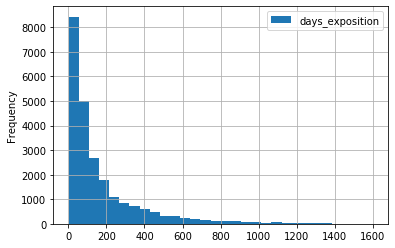

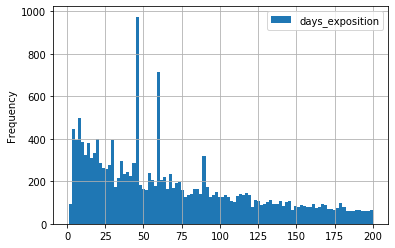

In [13]:
#2)Время продажи квартир.
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))
data['days_exposition'].describe()
#Среднее значение.
#data['days_exposition'].mean()
#156.60884425503187

#Медиана
#data['days_exposition'].median()
#74.0

#Аномальные значения
#data['days_exposition'].value_counts()
#0       3181
#45       880
#60       538
#7        234
#30       208

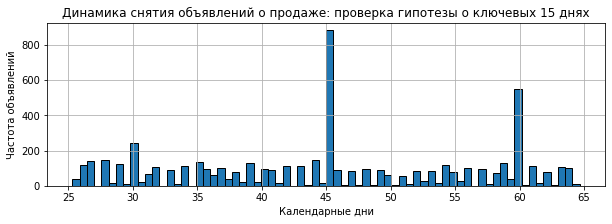

In [14]:
#Но что влияет на этот выборс между 45 и 60 днями:
data.query('25<days_exposition<65')['days_exposition'].hist(bins=70, figsize=(10,3), ec='black')
plt.title('Динамика снятия объявлений о продаже: проверка гипотезы о ключевых 15 днях')
plt.xlabel('Календарные дни')
plt.ylabel('Частота объявлений')
plt.show()


Здесь можно заметить, что разрыв между днями составляет 15 дней.Возможно эти "всплески" связаны с тем, что люди сами не закрывают свои объявления и есть какой-то автоматический счетчик на сайте. 

1. Похоже на распределение Пуассона.
2. Среднее значение 156.
3. Медиана 74.
4. Аномальные дни: 7,30,45,60, 90 - наиболее популярное время снятия объявлений.
5. Необычнайно долго то это где-то от 400(500) до 1580 дней - думается, что часть объявлений просто не закрыли.
6. Можно считать нормальное количество дней от 1 до 400(500).
7. Эти всплески на 45 и 60 днях можно объяснить тем, что сайт автоматически проверяет все объявления и каждые 15 дней закрывает забытые реализованные объявления (либо оператор опрашивает пользователей, либо приходит письмо на почту.


count    22541.000000
mean       173.944210
std        216.605858
min          1.000000
25%         40.000000
50%         91.000000
75%        216.000000
max       1580.000000
Name: days_exposition, dtype: float64

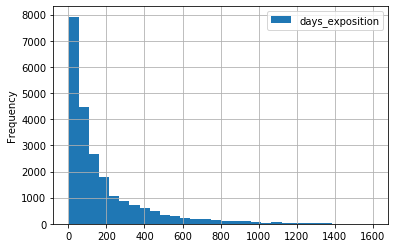

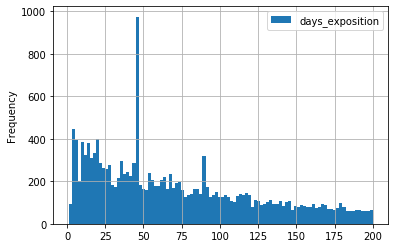

In [15]:
#3) Редкие и выбивающиеся значения
#Исходя из прошлого шага аномальные значения убираю из дней объявлений.
good_data = data.query('days_exposition != 45 and days_exposition != 30 and days_exposition != 60 and days_exposition != 90 and days_exposition != 7 and days_exposition != 0')
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))
good_data['days_exposition'].describe()

При очищении данных увеличились значения медиан и средних значений (114 / 195) и стали более равномерно распределены.

0.30196014387792547

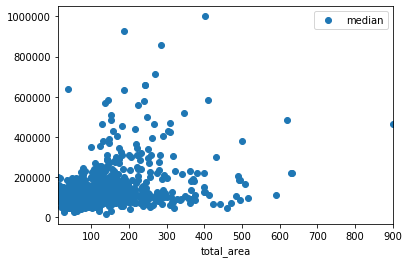

In [16]:
#4)Что влияет на стоимость квартиры
#За квадратный метр
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'price_sqmeter', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

data['total_area'].corr(data['price_sqmeter'])

Можно увидеть параодкс - стоимость не сильно возрастает от площади

0.6536750984527502

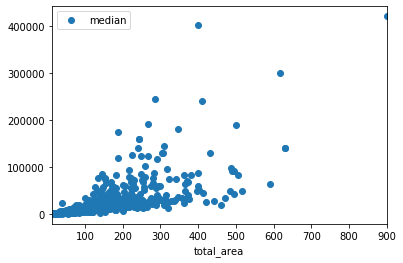

In [17]:
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

data['total_area'].corr(data['last_price'])

,mean,count,median
floor_category,,,
другой,103486.293305,17446,98295
последний,93410.267686,3336,87777
первый,81983.111759,2917,81223


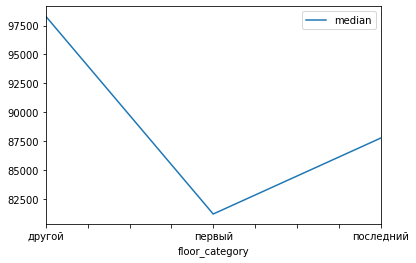

In [18]:
# Разница цен между этажами.
pivot_table_floor_category = data.pivot_table(index = 'floor_category', values = 'price_sqmeter', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median')
pivot_table_floor_category.sort_values('median', ascending = False)

На первом этаже квартиры чуть дешевле.


0.0554194996705922

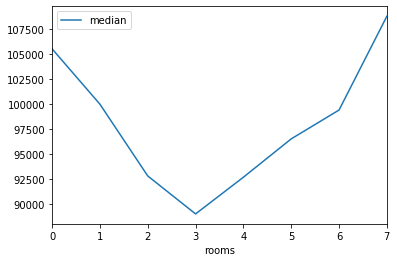

In [19]:
#Стоимость от комнат
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'price_sqmeter', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y = 'median')
pivot_table_rooms.query('count > 50').sort_values('median', ascending = False)
data['rooms'].corr(data['price_sqmeter'])

3-х комнатные кваритры оказались дешевле, думаю это связанно с практической составляющей - 3 комнаты идеально подходят для всех людей. Можно сказать, что это идеальный стандарт квартир.

-0.3179507368286467

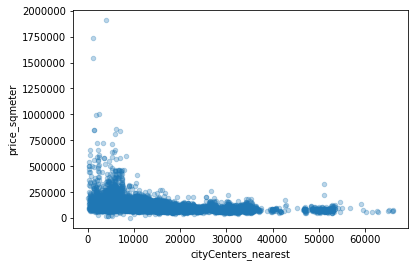

In [20]:
#Стоимость от удаленности от центра
data.plot(kind = 'scatter', y = 'price_sqmeter', x = 'cityCenters_nearest', alpha = 0.3)

data['cityCenters_nearest'].corr(data['price_sqmeter'])

Ну тут стандартно: чем ближе к центру, тем выше стоимость.

,mean,count,median
year,,,
2014,124830.000000,137,107000.0
2019,107123.332060,2879,103305.0
2018,97773.107290,8519,95689.0
2015,104613.756507,1191,93414.0
2017,97621.434188,8190,92564.5
2016,98321.900467,2783,91743.0


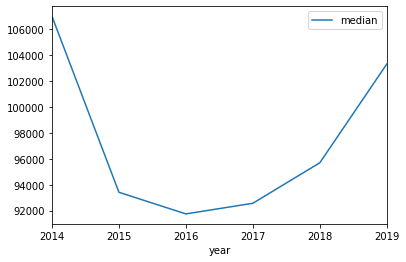

In [21]:
#Дата размещения: год
pivot_table_year = data.pivot_table(index = 'year', values = 'price_sqmeter', aggfunc = ['mean', 'count', 'median'])
pivot_table_year .columns = ['mean', 'count', 'median']
pivot_table_year .plot(y = 'median')

pivot_table_year .sort_values('median', ascending = False)

Цены на квартиры падали с 14 по 16 года, думаю, связанно с экономической неопределенностью того времени и началом экономического кризиса. А вот далее, научившись жить в новой системе цен и вещей, люди снова стали формировать предложение и спрос.

,mean,count,median
month,,,
4,101948.567045,2379,96451
8,100110.094037,1744,96026
9,100463.814740,1981,95607
11,99230.427246,2371,95588
3,98972.768844,2587,95238
1,99862.139333,1500,95222
2,98768.292045,2640,95000
7,99625.190560,1695,95000
12,99574.280926,1641,94262


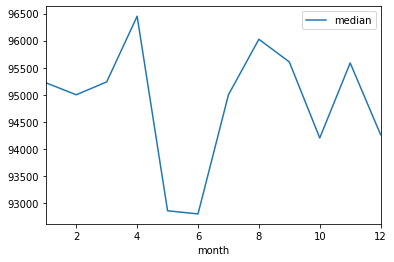

In [22]:
#Дата размещения: месяц
pivot_table_month = data.pivot_table(index = 'month', values = 'price_sqmeter', aggfunc = ['mean', 'count', 'median'])
pivot_table_month.columns = ['mean', 'count', 'median']
pivot_table_month.plot(y = 'median')

pivot_table_month.sort_values('median', ascending = False)

Самая высокая цена на кв.метр в апреле, а самая низкая в мае и июне - можно назвать "жилищной сезонностью". Возможно люди продают свою недвижимость перед летним сезоном для реализации планов постройки дач и загородных домов.

,mean,count,median
weekday,,,
1,99734.089410,4183,95634.0
2,99616.731002,3974,95473.0
3,100162.466356,4295,95143.0
0,99437.994463,3612,94688.0
4,99011.697000,4000,94616.0
6,97707.917010,1699,94501.0
5,99017.722107,1936,93545.5


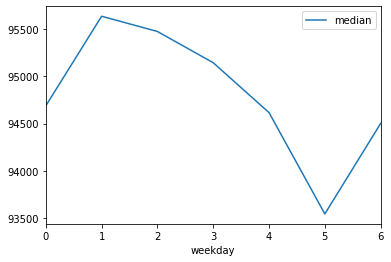

In [23]:
#Дата размещения: день
pivot_table_weekday = data.pivot_table(index = 'weekday', values = 'price_sqmeter', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday.columns = ['mean', 'count', 'median']
pivot_table_weekday.plot(y = 'median')

pivot_table_weekday.sort_values('median', ascending = False)

Цены высокие формируются в рабочее время - может это связано с тем, что общая рабочая активность происходит в момент рабочих дней.

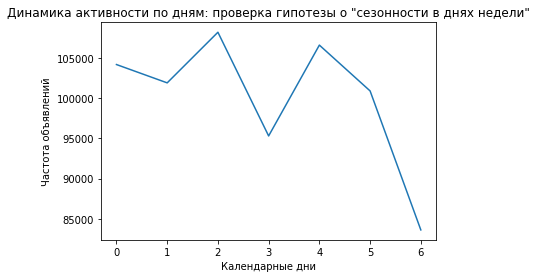

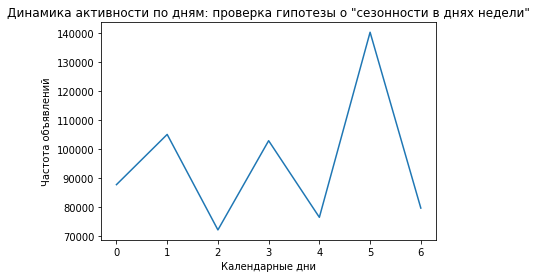

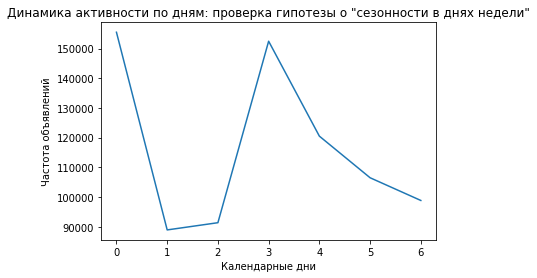

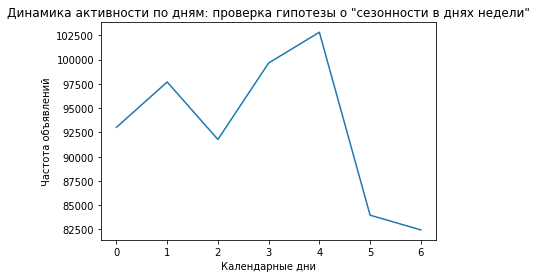

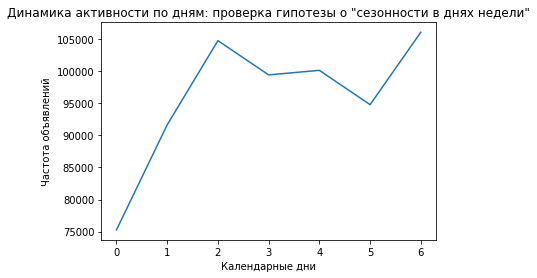

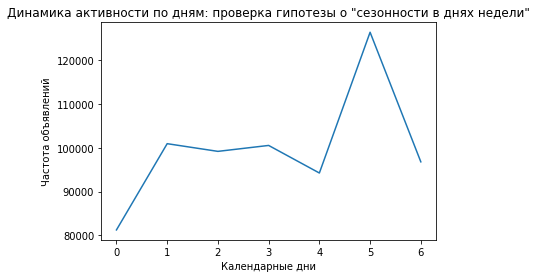

In [45]:
#Гипотеза: различие цен по дням в нескольких неделях.
for n in [5,13,28,37,45,50]:
    plt.plot(data[(data['week']==n)&(data['year']==2017)].groupby('weekday')['price_sqmeter'].mean())
    plt.title('Динамика активности по дням: проверка гипотезы о "сезонности в днях недели"')
    plt.xlabel('Календарные дни')
    plt.ylabel('Частота объявлений')
    plt.show()

1. На 5-ой неделе можно заметить, что показатели схожи с медианными, но в четверг показатели "проседают". (~примерно последняя неделя января-начало февраля)
2. 13-ая неделя отмечается высоким динамизмом и пик активности приходится на выходные дни.(15-20-е числа марта)
3. 28-ая неделя близка к медианным значениям, но пик активности - понедельник, четверг и птяница / вторник-среда самые низкие показатели, а в выходные дни активность идет на спад. (первые числа июля)
4. 37-ая неделя больше похожа не медианное знгачение по дням, но со спадом активности в среду. (конец августа-начало сентября)
5. 45-ая неделя соверещшенно иная динамика - активность начинается с середины недели. (первые числа ноября)
6. 50-ая неделя в течении раюочей недели динамика средняя (в понедельник самая низкая), наибольшая активность с пятницы до воскресенья. (первые числа декабря)

Итог: Если смотреть в среднем на показатели они близки к тем медианным значениям, но как оказалось здесь больше влияет сезон года (весенние прздники и планы на лето, летние отпуска, осенне-зимний период планов на следующий год - в каждом сезоне есть свои активные дни, будь то дни в рабочей недели или выходные дни).

,mean,count,median
week,,,
53,145084.727273,11,122340.0
11,102308.309707,649,100000.0
34,104726.097493,359,99137.0
18,107962.329341,334,99121.5
38,102616.560209,382,98933.5
32,101037.025172,437,98684.0
4,105362.080488,410,98511.5
30,103589.605714,350,98039.5
15,100679.803879,464,97527.0


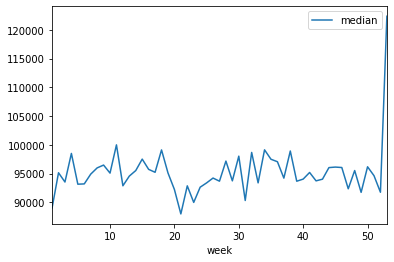

In [25]:
#Дата размещения: неделя
pivot_table_week = data.pivot_table(index = 'week', values = 'price_sqmeter', aggfunc = ['mean', 'count', 'median'])
pivot_table_week.columns = ['mean', 'count', 'median']
pivot_table_week.plot(y = 'median')

pivot_table_week.sort_values('median', ascending = False)

1. Активность в первые недели года - всё то же самое, что и с классической сезонностью.
2. Снижение активности на 20-25 неделях - это разгар летнего периода.
3. Новая активность после лета.
4. И бум в последние недели года - даже странно предполагать с чем это связанно, может люди надеятся продать недвижмость в новом году дороже чем имели/купили в прошлом.

mean  count    median
weekday week                                
2       53    132471.000000      2  132471.0
0       53    189365.250000      4  117230.5
        28    135250.782051     78  117126.5
1       50    125842.745614    114  113042.5
6       52    106974.523810     21  111696.0
...                     ...    ...       ...
3       3      90717.342105     38   78778.5
6       51     75347.142857      7   78014.0
        27     77900.307692     26   77753.5
5       51     84122.368421     19   77049.0
6       18     77982.187500     16   74539.5

[368 rows x 3 columns]

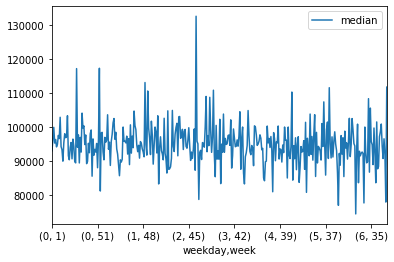

In [26]:
#Соотношение дней и недель:
pivot_table_weekday = data.pivot_table(index = ['weekday','week'], values = 'price_sqmeter', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday.columns = ['mean', 'count', 'median']
pivot_table_weekday.plot(y = 'median')

pivot_table_weekday.sort_values('median', ascending = False)

1. График сильно динамичный, что-то сказать особенного сложно - классическое олицетворение предложения на рынке.
2. Самый пик рассматривается в середние недели, а именно в среду. 
3. К выходным динамика уменьшается, пока в понедельник-вторник снова не начнет расти.

In [27]:
#5) 10 населенных пунктов с наибольшим числом объявлений.
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'price_sqmeter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
locality_pivot_table

,count,mean
locality_name,,
Санкт-Петербург,15721,114848.565231
посёлок Мурино,522,85751.733716
посёлок Шушары,440,78676.904545
Всеволожск,398,68654.007538
Пушкин,369,103125.373984
Колпино,338,75424.150888
посёлок Парголово,327,90175.489297
Гатчина,307,68745.693811
деревня Кудрово,299,92473.086957


In [28]:
#самая высокая стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,15721,114848.565231


In [29]:
#самая низкая стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()]

,count,mean
locality_name,,
Выборг,237,58141.489451


Ожидаемо больше объявлений в СПб. Меньше в Выборге - стандартная ситуация, что люди переезжают в более крупные города.

In [30]:
#6) Предложения квартир.
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest']/1000, 0)
pivot_table_km = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km <= 8000').pivot_table(index = 'cityCenters_nearest_km', values = ['price_sqmeter','last_price'], aggfunc = 'mean')
pivot_table_km.head()
pivot_table_km

,last_price,price_sqmeter
cityCenters_nearest_km,,
0.0,31449.111111,245833.111111
1.0,21206.718750,177004.963542
2.0,17788.319355,157848.564516
3.0,11126.580000,121386.991429
4.0,13304.279070,133282.422965
5.0,14499.121739,140509.339130
6.0,15338.420712,151011.750809
7.0,14775.150000,156176.445238
8.0,9957.715243,125671.030151


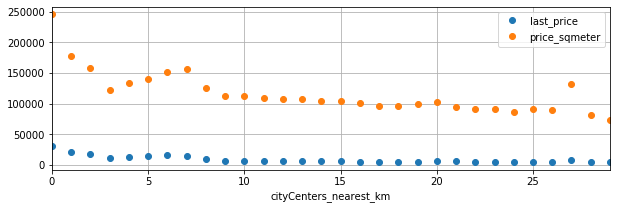

In [31]:
pivot_table_km.plot(style='o',grid=True, figsize=(10, 3))

Посмотря на график можно увидеть несколько "всплесков": 
1. до 5 км, скорее можно разграничить "Центр" и "Самый Центр";
2. Переходящий с 7 до 8 км, смотря на таблицу с ценами можно сделать вывод, что центр начинается с 8 км - как периферия центра, 7 км - непосредсвтенно центр
3. За 25 км и больше скорее всего это новое жилье - субурбия и муравейники.

In [32]:
#7) Сегмент квартир в центре.
center_spb_stat = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km <= 8000').pivot_table(index = 'cityCenters_nearest_km', 
                                              values=['total_area','ceiling_height','rooms','last_price'], aggfunc='mean' )
center_spb_stat.head(9)

,ceiling_height,last_price,rooms,total_area
cityCenters_nearest_km,,,,
0.0,3.244752,31449.111111,3.074074,117.259259
1.0,3.119185,21206.718750,3.265625,104.999896
2.0,3.135480,17788.319355,3.145161,102.504000
3.0,3.141337,11126.580000,2.997143,90.273429
4.0,3.073392,13304.279070,2.956395,91.475494
5.0,3.001390,14499.121739,2.839130,95.887185
6.0,2.932652,15338.420712,2.572816,90.785615
7.0,2.870657,14775.150000,2.430952,82.058762
8.0,3.065991,9957.715243,2.306533,73.546114


0.25386724257638044

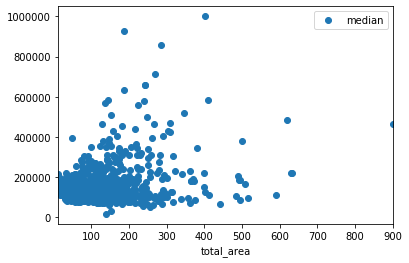

In [33]:
center_spb_data = data.query('cityCenters_nearest_km <= 8 and locality_name == "Санкт-Петербург"')
center_spb_total_area = center_spb_data.pivot_table(index = 'total_area', values = 'price_sqmeter', aggfunc = ['mean', 'count', 'median'])
center_spb_total_area.columns = ['mean', 'count', 'median']
center_spb_total_area.plot(y = 'median', style = 'o')

center_spb_total_area.sort_values('median', ascending = False)

center_spb_data['total_area'].corr(center_spb_data['price_sqmeter'])

1. В основном, в центре, по 2-3 комнаты.
2. Потолки в 3-2 метра. Про 2 метра, думаю довольно странно, надеялся увидеть 5 метровые потолки.
3. Большая площадь - дореволюционные дома этим славятся.
4. Соответсвтенно цены выставлены, наверное, исходя из логистического удобства и эстетического вида - всё то, чем славится центр любого города.

0.012628055452509751

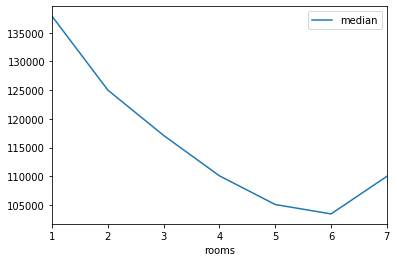

In [34]:
#комнаты.
center_spb_rooms = center_spb_data.pivot_table(index = 'rooms', values = 'price_sqmeter', aggfunc = ['mean', 'count', 'median'])
center_spb_rooms.columns = ['mean', 'count', 'median']
center_spb_rooms.query('count > 50').plot(y = 'median')

center_spb_rooms.query('count > 50').sort_values('median', ascending = False)

center_spb_data['rooms'].corr(center_spb_data['price_sqmeter'])

Чем меньше комнат, тем дороже квартира - Думаю, это связано с тем, что квартиры со свободной планирвкой легче обустраивать, да и, учитывая, что квартиры долгое время находились в системе "коммуналок", то легче  такое жилье покупать и оформлять. 

,mean,count,median
floor_category,,,
другой,145286.512898,2985,127160.0
первый,121109.534247,438,108027.5
последний,143385.701001,699,116197.0


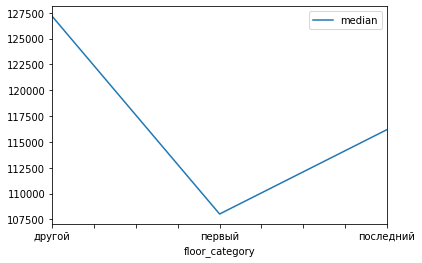

In [35]:
#этаж
center_spb_floor_category = center_spb_data.pivot_table(index = 'floor_category', values = 'price_sqmeter', aggfunc = ['mean', 'count', 'median'])
center_spb_floor_category.columns = ['mean', 'count', 'median']
center_spb_floor_category.plot(y = 'median')
center_spb_floor_category

Особых различий между центром и остальным городом нет, на первом этаже дешевле.

-0.0626591185650816

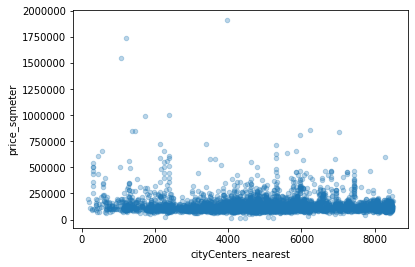

In [36]:
#удаленность от центра
center_spb_data.plot(kind = 'scatter', y = 'price_sqmeter', x = 'cityCenters_nearest', alpha = 0.3)
center_spb_data['cityCenters_nearest'].corr(center_spb_data['price_sqmeter'])

Цены равномерно распределены.

,mean,count,median
year,,,
2019,155789.201342,447,133507.0
2018,138394.185805,1254,124173.5
2016,143294.809859,568,121289.5
2015,143737.461972,355,120881.0
2017,140118.861433,1465,120625.0


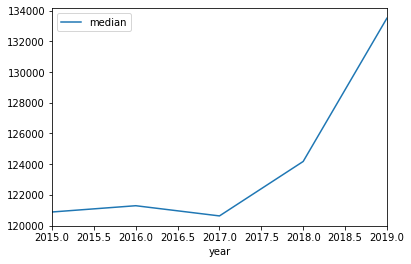

In [37]:
#дата размещения:год

center_spb_year = center_spb_data.pivot_table(index = 'year', values = 'price_sqmeter', aggfunc = ['mean', 'count', 'median'])
center_spb_year.columns = ['mean', 'count', 'median']
center_spb_year.query('count > 50').plot(y = 'median')

center_spb_year.query('count > 50').sort_values('median', ascending = False)


Не было падений в 14-16 годах, но видно, что в 16-17 годах график пошел на спад.

,mean,count,median
month,,,
3,144346.590389,437,130333.0
5,137576.859504,242,129042.0
1,143321.096899,258,128429.5
4,151645.863753,389,126637.0
8,142977.163399,306,125598.0
9,140612.105691,369,122860.0
11,138954.629353,402,121890.0
2,141710.897260,438,121285.0
12,145358.467857,280,121037.0


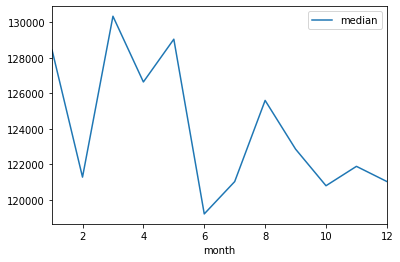

In [38]:
#дата размещения:месяц
center_spb_month = center_spb_data.pivot_table(index = 'month', values = 'price_sqmeter', aggfunc = ['mean', 'count', 'median'])
center_spb_month.columns = ['mean', 'count', 'median']
center_spb_month.plot(y = 'median')

center_spb_month.sort_values('median', ascending = False)

Также как и во всем городе: перед наступлением лета и после лета.

,mean,count,median
weekday,,,
6,142793.967347,245,129032.0
5,152783.792763,304,126930.0
0,142915.266559,619,125382.0
2,140467.242254,710,123744.5
4,140418.401439,695,123584.0
3,142068.265330,848,122276.5
1,141599.225392,701,121000.0


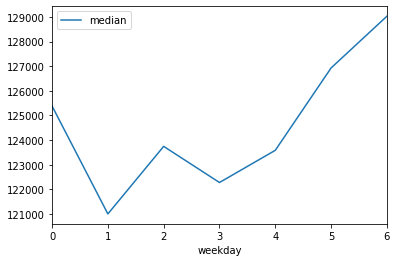

In [39]:
#дата размещения:день
center_spb_weekday= center_spb_data.pivot_table(index = 'weekday', values = 'price_sqmeter', aggfunc = ['mean', 'count', 'median'])
center_spb_weekday.columns = ['mean', 'count', 'median']
center_spb_weekday.plot(y = 'median')

center_spb_weekday.sort_values('median', ascending = False)

Здесь уже больше объявлений в выходные дни + понедельник.

### Шаг 5. Общий вывод


1. Изначальный архив данных вбирал в себя всю инфоормацию по недвижимости в СПб и ЛО.
2. Этот архив был немного изменен и скорректирован для удобного анализа - обработаны пропущенные значения и изменены типы данных, добавлены столбцы с квадратным метром, даты объявлений (дни недели, месяцы, года).
3. Были изучены параметры площади, количества комнат, высоты потолков.
4. Было вяснено, что объявления закрывают автоматически поэтому существует разница в 15 дней и самым явными явлются 45 и 60 день объявления.
5. Традиционно на стоимость жилья влияют: количество комнат, этаж, и удаленность от центра.
6. При этом в центре чем меньше комнат, тем дороже, а цены по центру распределены равномерно.
7. До 2015 г. был спад на объявления.
8. Но с 2015 происходит активный рост объявлений.
9. Выявлется сезонная закономерность для центра и остального Санкт-Петербурга: квартиры продают преимущественно перед летним периодом и после (даже с  августа).


### Рекомендации:
1. Улучшить систему маппинга, чтобы названия населенных пунктов не терялись. + Сформировать группы в этих населенных пунктах (По количеству комнат, по средней цене на кв.метр, по расстоянию до СПб и Центра СПБ + Аэропорт, наличие парков и водоемов) - всё это может использоваться в маркетинговых целях.
2. Выделить самые просмотраиваемые объявления и ввести систему достоверности, в целях снижения количества мошенников.
3. Создать категории "дешевого", "среднего" и "дорогого" жилья - где группировка будет происходит исходя из коэффициента стоимости за кв. метр, локации, логистических удобств, общей площади.
